<DIV ALIGN=CENTER>

# Introduction to Distribution Visualizations
## Professor Robert J. Brunner
  
</DIV>  
-----
-----


Note: We will always use this line to ensure that all figures appear inline within an iPython notebook.

-----

In [1]:
%matplotlib inline

## Histograms

A [histogram](http://en.wikipedia.org/wiki/Histogram) is a binned
representation of a data set. As a result, it provides a concise
representation of a data along one dimension, where the size of the
representation is determined solely by the number of bins used and not
the total number of data points. As a result, it can be used to provide
a concise summary of a very large data set. 

### Binning

Sometimes the binning can be determined easily, for example, months of
the year or days of the week might provide natural bins. Other times,
both the number of bins and the bin ranges will need to be determined
before the histogram is constructed. A general rule of thumb is that if
you have N data points you should have root-three N bins. The following
code summarizes the results form this formula:

-----

In [2]:
# We need to import the math library for the ceil method, which returns the next largest 
# integer to a floating point value

import math as ma

# We want to loop from 10 to 100,000,000
for i in range(1,8):
    
    # Now print out the integer value, and the number of bins
    # We used a math trick here, 10**i**(1/3) = 10**(i/3)
    print("{0:9d}\t{1:4d}\n".format(10**i, ma.ceil(pow(10, i/3.))))

       10	   3

      100	   5

     1000	  10

    10000	  22

   100000	  47

  1000000	 100

 10000000	 216



-----

### Making a Histogram

Now we are in position to actually demonstrate how to make and display a
histogram by using matplotlib. We first will need data, which for this
example we create by randomly generating data. We also start by using
the default number of bins, which is ten, and bin range, which is the
minimum and maximum data values.

-----

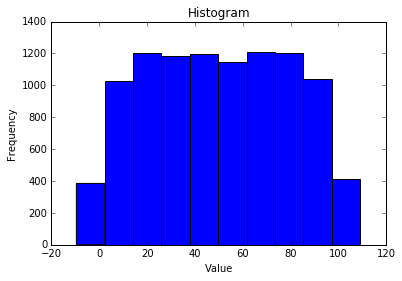

In [3]:
# First we need to import matplotlib and numpy
import matplotlib.pyplot as plt
import numpy as np

# Now we create our figure and axes for the plot we will make.
fig, ax = plt.subplots()

# Now we generate something to plot. In this case, we will need lots of data 
# that are randomly sampled from a particular function.

x = np.linspace(0, 100, 10000)
y = x + np.random.uniform(-10, 10, 10000)

# Now we want to make a default histogram
ax.hist(y)# , bins=10 , histtype='stepfilled', normed=False, color='BurlyWood', label='Gaussian')

# Set our axis labels and plot title
ax.set_title("Histogram")
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")

#Show final result
plt.show()

-----

In this simple example, we first construct random data in a similar
manner as we did when making scatter plots in the previous lesson. We
first create an  array of 10,000 elements that are linearly spaced
between 0 and 100. This array is used to create a second array, where
each value has now been perturbed by a randomly selected value between
-10 and 10. If we did not do this random perturbation the histogram
would be flat since we have the same number of values in each bin.
Matplotlib automatically creates the ten bins and computes the frequency
with which values in the input data set occur in each bin and plots the
results.

### Histogram Options

Now that our first histogram is completed, we can look at changing the
default selections, such as the number of bins, the bin centers, and the
color and style of the histogram bins. These values can all be changed
by passing parameters into the histogram function. 

First, the number and locations of the bins used to construct the
histogram can be specified by using the bin parameter. There are several
different ways to control this parameter:

- `bins = 22` will give twenty-two bins
- `bins = (0,20,90,100)` will produce three bins that span 0-20, 20-90,
and 90-100, respectively.
- `bins = np.linspace(0, 100, 100)` will produce one hundred bins
linearly spaced between zero and one hundred.

Second, there are four different types of histogram plots that you cane
make: `bar`, `barstacked`, `step`, and `stepfilled`, with `bar` being
the default value. Third, you can specify the line or fill color of the
bins by defining the `color` parameter. For example, `color =
'BurlyWood'` will set the histogram color to be the web-safe color
`BurlyWood`. For more color examples, see the [HTML color
name](http://www.w3schools.com/html/html_colornames.asp) page, other
colors that you might try to use include AntiqueWhite, DarkSalmon,
DarkTurquoise, IndianRed, or PeachPuff.  Use the following code example
to see how these parameters change the appearance of the sample
histogram.

-----

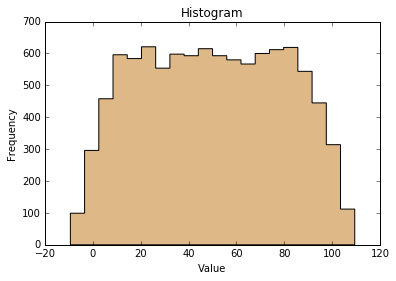

In [4]:
# First we need to import matplotlib and numpy
import matplotlib.pyplot as plt
import numpy as np

# Now we create our figure and axes for the plot we will make.
fig, ax = plt.subplots()

# Now we generate something to plot. In this case, we will need lots of data 
# that are randomly sampled from a particular function.

x = np.linspace(0, 100, 10000)
y = x + np.random.uniform(-10, 10, 10000)

# Now we want to make a modified histogram
ax.hist(y, bins=20, histtype='stepfilled', color='BurlyWood')

# Set our axis labels and plot title
ax.set_title("Histogram")
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")

#Show final result
plt.show()

-----

### Histogram Range

Sometimes the frequency counts can very dramatically between bins. In
that case, it is often convenient to change the presentation of the
frequency counts to improve the discrimination of different bin counts.
This can easily be accomplished by changing the vertical axis to display
the logarithm of the frequency count, which is done by setting the
optional parameter `log` to `True`. in the following example, see the
difference in the generated histogram by changing to a log histogram by
setting `log=True` in the histogram method.

-----

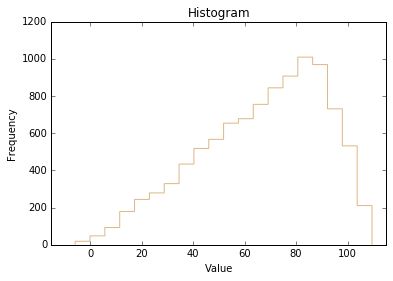

In [5]:
# First we need to import matplotlib and numpy
import matplotlib.pyplot as plt
import numpy as np

# Now we create our figure and axes for the plot we will make.
fig, ax = plt.subplots()

# Now we generate something to plot. In this case, we will need data 
# that are randomly sampled, but we want the to be non-uniform

x = np.sqrt(np.linspace(0, 10000, 10000))
y = x + np.random.uniform(-10, 10, 10000)

ax.hist(y, bins=20 , histtype='step', color='BurlyWood', log=False)

ax.set_title("Histogram")
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
ax.set_xlim(-15, 115)
plt.show()

-----

### Probability

Another use of a histogram is to display the normalized frequency
counts, which can also be interpreted as the probability that a
particular value lies within a given bin. Formally, this is computed by
diving the bin counts by the total counts (or frequencies of occurrence
by the total number of occurrences). But with matplotlib, we simply need
to set the optional `normed` parameter to `True`. The values on the
y-axis will now be the normalized probability for a value to lie within
the bin, which means that the total probability musty be multiplied by
the width of the bin (as can be seen in the examples).

Note that we now change the y-axis label to __Probability__ reflect the
change in what is being displayed.

-----

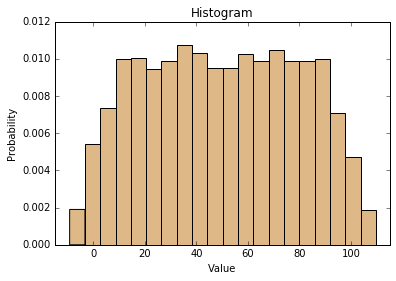

In [6]:
# First we need to import matplotlib and numpy
import matplotlib.pyplot as plt
import numpy as np

# Now we create our figure and axes for the plot we will make.
fig, ax = plt.subplots()

# Now we generate something to plot. In this case, we will need data 
# that are randomly sampled from a particular function.

x = np.linspace(0,100, 10000)
y1 = x + np.random.uniform(-10, 10, 10000)
y2 = x + np.random.uniform(-25, 25, 10000)

ax.hist(y1, bins=20 , histtype='bar', normed=True, color='BurlyWood')

# Complete the plot, but change the y-axis labal accordingly
ax.set_title("Histogram")
ax.set_xlabel("Value")
ax.set_ylabel("Probability")
ax.set_xlim(-15, 115)
plt.show()

-----

### Multiple Histograms

In certain cases, it may be instructive to compare two distributions
directly within the same plot. For example, if you have computed a
histgoram of the ages of people in a population, you might want to
differentiate the male and female populations in separate histograms for
comparison. This can easily be done by simply overplotting two
histograms. In the following example, we create two populations: y1 and
y2, and display their histograms within the same plot window. Note that
by default, the two histograms will be overplotted, so to allow both to
be seen, we set the `alpha` parameter in the second one, which make the
second histogram somewhat transparent (based on the value assigned to
the `alpha` parameter).

We also assign a label to each histogram, so that the `legend` method
can be used to differentiate between the two histograms.

-----

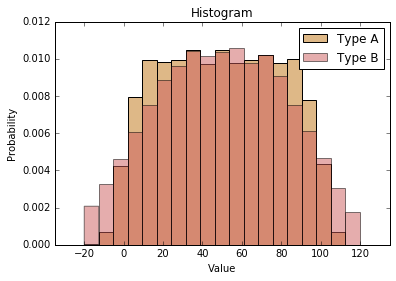

In [7]:
# First we need to import matplotlib and numpy
import matplotlib.pyplot as plt
import numpy as np

# Now we create our figure and axes for the plot we will make.
fig, ax = plt.subplots()

# Now we generate something to plot. In this case, we will need data 
# that are randomly sampled from a particular function.

x = np.linspace(0,100, 10000)
y1 = x + np.random.uniform(-10, 10, 10000)
y2 = x + np.random.uniform(-25, 25, 10000)

mybins = np.linspace(-20,120,20)
ax.hist(y1, bins=mybins, histtype='bar', normed=True, color='BurlyWood', label='Type A')
ax.hist(y2, bins=mybins, histtype='bar', normed=True, color='IndianRed', label='Type B', alpha=0.5)

# Complete the plot, and include a legend.

ax.set_title("Histogram")
ax.set_xlabel("Value")
ax.set_ylabel("Probability")
ax.set_xlim(-35, 135)
ax.legend()
plt.show()

-----

The two histograms can also be plotted side-by-side, which can often
simplify a comparison. In the following example, we plot three
histograms side-by-side. In this case, we pass the three data sets as a
list to the same histogram method call, which means we also need to pass
the colors and labels as a list. All other parameters will be assigned
equally to the three histograms.

In this sample code, we have also used the [figure
method](http://matplotlib.org/api/figure_api.html#matplotlib.figure.
Figure) to specify a larger plot window (which is helpful for multiple
histograms), and also used the attributes in the [add_subplot
method](http://matplotlib.org/api/figure_api.html#matplotlib.figure.
Figure.add_subplot) to specify only one subplot, which should have an
'Ivory' background.

-----

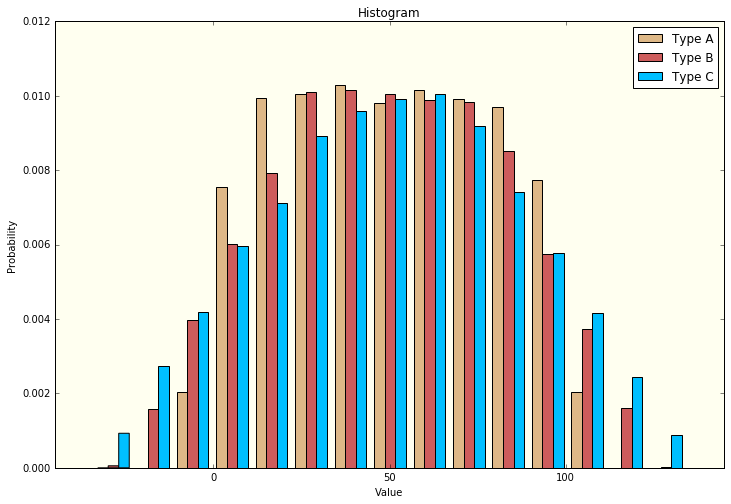

In [8]:
# First we need to import matplotlib and numpy
import matplotlib.pyplot as plt
import numpy as np

# Now we create our figure and axes for the plot we will make.
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, axisbg='Ivory')

# Now we generate something to plot. In this case, we will need data 
# that are randomly sampled from a particular function.

x = np.linspace(0,100, 10000)
y1 = x + np.random.uniform(-10, 10, 10000)
y2 = x + np.random.uniform(-25, 25, 10000)
y3 = x + np.random.uniform(-35, 35, 10000)

ax.hist((y1, y2, y3), bins=15 , histtype='bar', normed=True, \
        color=('BurlyWood', 'IndianRed', 'DeepSkyBlue'), label=('Type A', 'Type B', 'Type C'))

# Complete the plot

ax.set_title("Histogram")
ax.set_xlabel("Value")
ax.set_ylabel("Probability")
ax.set_xlim(-45, 145)
ax.legend()
plt.show()

-----

In all of the sample code provided in this notebook, we have ignored the
return values from the `hist` method. In truth, this function returns
three items:

* `n`, the number contained within each bin. The length of this array is
the same as the number of bins used to make the histogram.
* `bins`, the bin edges. The number of edges is one more than the number
of bins.
* `patches`, which are matplotlib plotting objects (to make the bins
show up) but you will generally ignore these.

The first two arrays can often prove useful if you want to operate on
the histogrammed data (in addition to plotting them). To use these data,
you simply capture the returned values:

```python
n, bins, patches = ax.hist(y)
```

-----